# Henry Ezeanowi - 8900446
# Lab 3

In [3]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


## PART A

In [4]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Checking for missing values

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Dropping the time column because it is has no significance statistically

In [6]:
df = df.iloc[:,1:]
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Standardizing the amount column to maintain uniformity

In [7]:
df['Amount'] = (df['Amount'] - df['Amount'].mean())/df['Amount'].std()
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342474,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160684,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350150,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254116,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313248,0


Exploring the data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

Summary statistics

In [9]:
round(df.describe(),2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00
std,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,1.00,0.04
min,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,-0.35,0.00
25%,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,-0.33,0.00
50%,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,-0.27,0.00
75%,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,-0.04,0.00
max,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,102.36,1.00


Plotting the data to understand the distribution

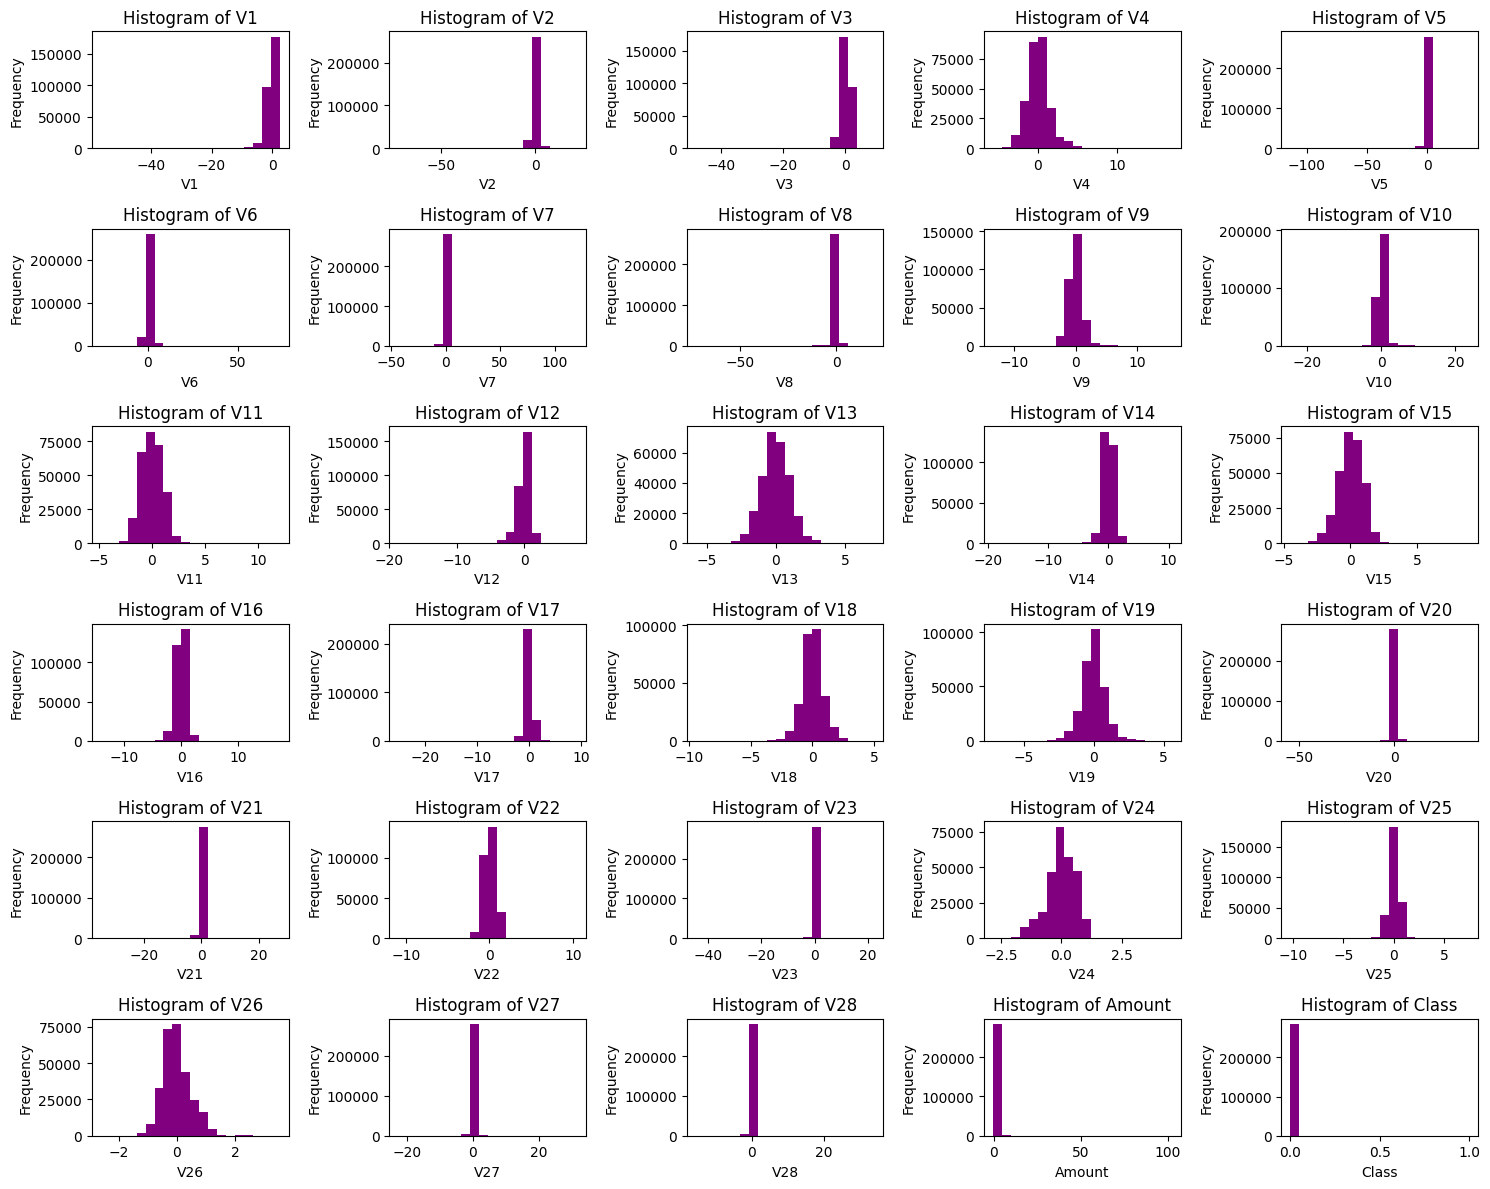

In [13]:
# Create a 6x5 grid of subplots (30 histograms in total)
num_rows, num_cols = 6, 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Flatten the 2D array of axes to 1D for easier iteration
axes = axes.flatten()

# Loop through each column and create a histogram on a separate axis
for i, (column, ax) in enumerate(zip(df.columns, axes)):
    ax.hist(df[column], bins=20, facecolor="purple")  # You can adjust the number of bins for better visualization
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

Majority of the independent variables are normally distributed. </br> The taget variable 'class' has a significant class imbalance

Correlation matrix

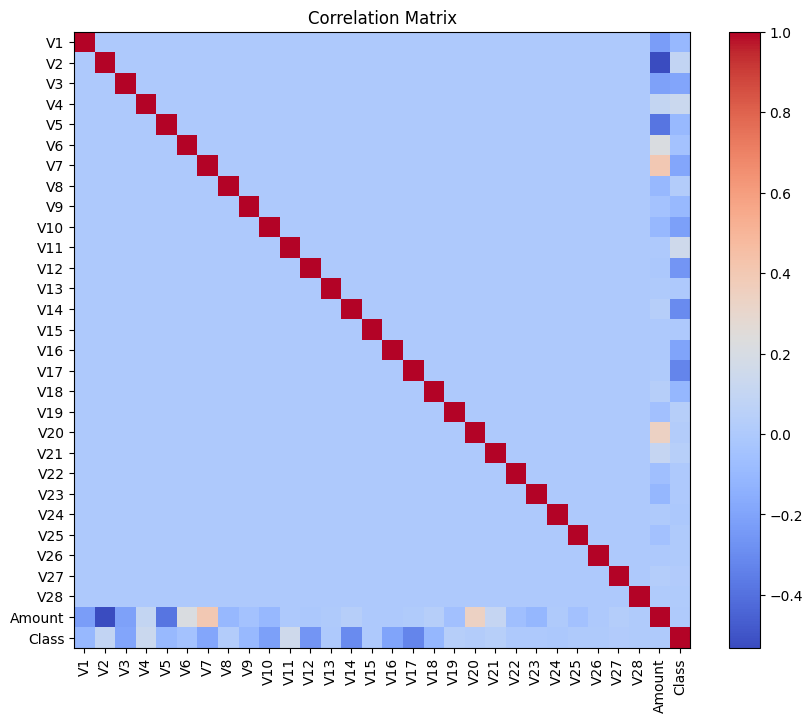

In [14]:
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Matrix")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

There is a strong negative correlation between V2 and Amount; V5 and Amount, </br>
Also, there is a positive correlation between V7 and Amount; V20 and Amount

Scatter plots of the columns mention above

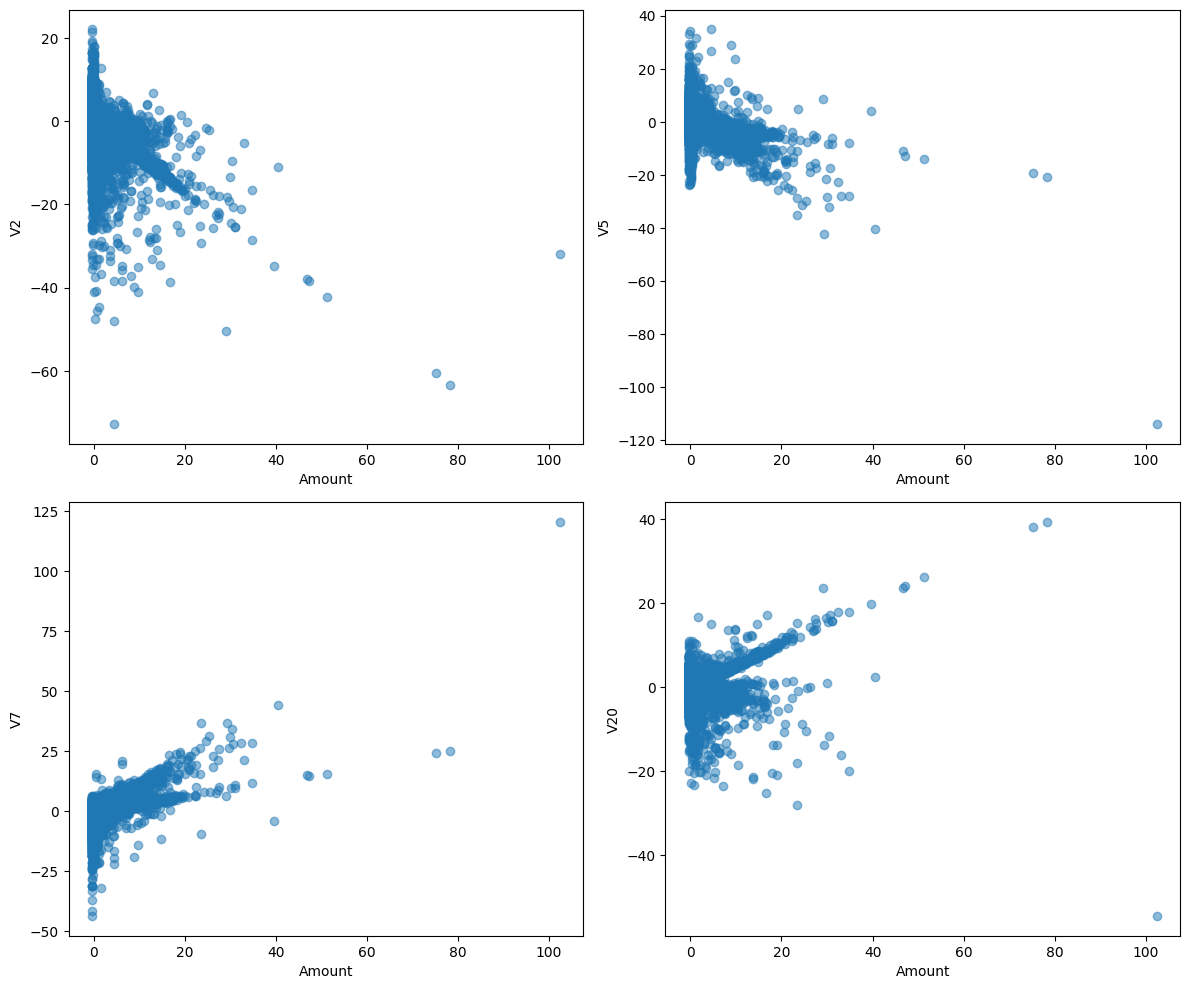

In [15]:
# Select the desired columns for scatter plots
selected_columns = ['V2', 'V5', 'V7', 'V20']

# Create a 2x2 grid of subplots for the scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the 2D array of axes to 1D for easier iteration
axes = axes.flatten()

# Loop through each selected column and create a scatter plot with 'Amount'
for i, column in enumerate(selected_columns):
    ax = axes[i]
    ax.scatter(df['Amount'], df[column], alpha=0.5)
    ax.set_xlabel('Amount')
    ax.set_ylabel(column)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

### Building the model

Train and test split

In [17]:
# Splitting the data using stratified sampling to compensate class imbalance

X = df.iloc[:,:-1]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle = True, stratify = y, random_state=16)

print('The True Classes in y_train are:', y_train[y_train == 1].sum())
print('The True Classes in y_test are:', y_test[y_test == 1].sum())

Training the model

In [18]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression()

In [19]:
print('The model intercept is:', lr_model.intercept_)
print('The model feature names are:', lr_model.feature_names_in_)
print('The model coefficients are:', lr_model.coef_)

The model intercept is: [-8.62151523]
The model feature names are: ['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25'
 'V26' 'V27' 'V28' 'Amount']
The model coefficients are: [[ 0.07833963 -0.00169435  0.03901754  0.67726938  0.0642087  -0.12546581
  -0.12175859 -0.16539341 -0.27590521 -0.83290285 -0.01222455  0.0894219
  -0.34179    -0.55832793 -0.11891711 -0.2411437   0.07091471 -0.02684696
   0.12302979 -0.44320369  0.39221289  0.60536276 -0.11327048  0.09194799
  -0.05452185  0.09697347 -0.85081476 -0.25366461  0.24147371]]


Using the model to predict the classes for the test data

In [21]:
y_pred = lr_model.predict(X_test)
print(y_pred)
y_pred[y_pred == 1].sum() 

[0 0 0 ... 0 0 0]


114

The model predicted 114 Fraud transactions

Evaluating the model's performance

Wtihout Cross Validation 

In [27]:
# Find the Logistic Regression model performance metrics without cross-validation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("The accuracy score:", accuracy_score(y_test, y_pred))

print("The confusion matrix:", confusion_matrix(y_test, y_pred), sep = '\n')

print("The recall score:", recall_score(y_test, y_pred))

print("The precision score:", precision_score(y_test, y_pred))

print("The f1 score:", f1_score(y_test, y_pred))

The accuracy score: 0.9993211848834895
The confusion matrix:
[[85283    12]
 [   46   102]]
The recall score: 0.6891891891891891
The precision score: 0.8947368421052632
The f1 score: 0.7786259541984732


With Cross Validation

In [28]:
# Performing Cross validation on logistic Regression Classification model

from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(lr_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

from sklearn.metrics import make_scorer

# Define the precision scoring metric
precision_scorer = make_scorer(precision_score, average='weighted') # The average ='weighted' will consider the class imbalance.

# Perform cross-validation with precision scoring
cross_val_scores = cross_val_score(lr_model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16), scoring=precision_scorer)

# Print the cross-validation scores
print("Cross-validation precision scores:", cross_val_scores)
print("Mean precision:", cross_val_scores.mean())

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') # average='macro': The recall score is calculated for each class individually, and then the average of these scores is computed. It gives equal weight to each class, regardless of class imbalance.

recall_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring=scoring)

# Print the recall scores for each fold
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
mean_recall_score = recall_scores.mean()
print("Mean Recall Score:", mean_recall_score)

Cross-validation accuracy scores: [0.99909713 0.99909713 0.99907205 0.99934793 0.99897171]
Mean accuracy: 0.9991171919429662
Cross-validation precision scores: [0.99902713 0.9990138  0.99901878 0.99930714 0.9988544 ]
Mean precision: 0.9990442504884998
Cross-validation Recall Scores: [0.79703864 0.78979226 0.83325796 0.77531207 0.79391666]
Mean Recall Score: 0.7978635210228328


The model correctly predicted 102 fraud transaction, but mistakenly labeled 12 transactions as fradualant</br>
The model misinterpreted 46 fradualant transaction as safe transactions</br>
The model has high accuracy and high precision but has an average recall score</br>

## PART B

In [29]:
df2 = pd.read_csv("insurance.csv")
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Info of the dataset

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking for missing values

In [32]:
df2.isna().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

One hot encoding of the categorical data

In [35]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder()

# Apply OneHotEncoder to the 'sex', 'smoker', and 'region' columns
onehot_encoded = onehot_encoder.fit_transform(df2[['sex', 'smoker', 'region']])

# Convert the one-hot encoded result to a DataFrame and join it back to the original DataFrame
onehot_encoded_df2 = pd.DataFrame(onehot_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(['sex', 'smoker', 'region'])).astype(int)
df2 = pd.concat([df2, onehot_encoded_df2], axis=1)

# Drop the original 'sex', 'smoker', and 'region' columns
df2.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

# Move 'charges' column to the last position
charges_column = df2.pop('charges')
df2['charges'] = charges_column

print(df2)

      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes   
0      19  27.900         0           1         0          0           1  \
1      18  33.770         1           0         1          1           0   
2      28  33.000         3           0         1          1           0   
3      33  22.705         0           0         1          1           0   
4      32  28.880         0           0         1          1           0   
...   ...     ...       ...         ...       ...        ...         ...   
1333   50  30.970         3           0         1          1           0   
1334   18  31.920         0           1         0          1           0   
1335   18  36.850         0           1         0          1           0   
1336   21  25.800         0           1         0          1           0   
1337   61  29.070         0           1         0          0           1   

      region_northeast  region_northwest  region_southeast  region_southwest   
0      

Summary Statistics

In [39]:
df2.describe()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900,13270.422265
std,14.049960,6.098187,1.205493,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995,12110.011237
min,18.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9382.033000
75%,51.000000,34.693750,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63770.428010


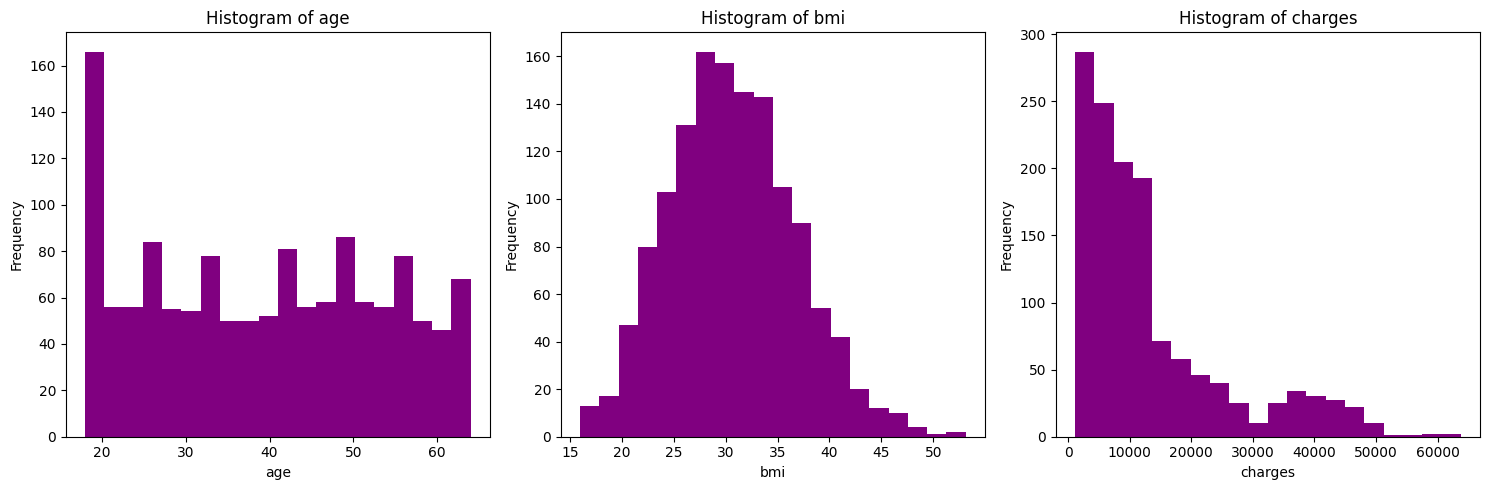

In [41]:
# Create a grid of 3 subplots
num_rows, num_cols = 1, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Flatten the 2D array of axes to 1D for easier iteration
axes = axes.flatten()

# Selected columns
columns = ['age', 'bmi', 'charges']

# Loop through each column and create a histogram on a separate axis
for i, (column, ax) in enumerate(zip(columns, axes)):
    ax.hist(df2[column], bins=20, facecolor="purple")  # You can adjust the number of bins for better visualization
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

The histograms show that there are almost equal number of people that belongs to different age groups in the dataset. The bmi variable is normally distributed. The insurance charges were right skewed with a majority of low amount insurance charges.

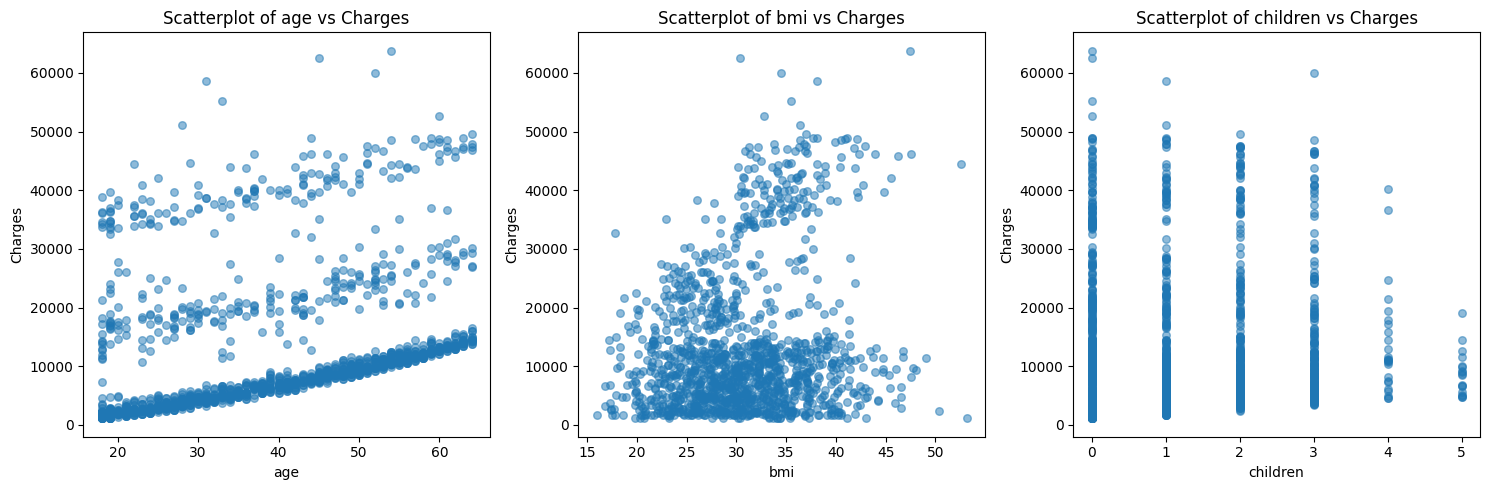

In [43]:
# Create a grid of 1 row and 3 columns
num_rows, num_cols = 1, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Flatten the 2D array of axes to 1D for easier iteration
axes = axes.flatten()

# Selected columns
columns = ['age', 'bmi', 'children']

# Loop through each column and create a scatterplot on a separate axis
for i, (column, ax) in enumerate(zip(columns, axes)):
    ax.scatter(df2[column], df2['charges'], marker='o', s=30, alpha=0.5)  
    ax.set_title(f'Scatterplot of {column} vs Charges')
    ax.set_xlabel(column)
    ax.set_ylabel('Charges')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

The charges has positive correlation with age and bmi; negatively correlated with number of children. This means that as the age increases insurance charges increases, as the bmi increases insurance charges increases, as the number of children increases insurance charges deceases.

Building the Model

Train Test Split

In [46]:
X = df2.iloc[:,:-1]
y = df2['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle = True, random_state=16)

Training the Model

In [47]:
model = LinearRegression() # Intitializing the model
model.fit(X_train, y_train) # Fitting model with training data
model

LinearRegression()

In [48]:
print('The model intercept is:', model.intercept_)
print('The model feature names are:', model.feature_names_in_)
print('The model coefficients are:', model.coef_)

The model intercept is: -1507.3123052665633
The model feature names are: ['age' 'bmi' 'children' 'sex_female' 'sex_male' 'smoker_no' 'smoker_yes'
 'region_northeast' 'region_northwest' 'region_southeast'
 'region_southwest']
The model coefficients are: [   254.76459615    365.12020743    356.62896093    215.69646656
   -215.69646656 -11869.77601844  11869.77601844    950.56604765
    217.9214676    -584.06030919   -584.42720607]


Using the model to predict the insurance charges for the test data

In [49]:
y_pred = model.predict(X_test) 
y_pred

array([ 9.47912078e+03,  3.78055115e+03,  3.01381327e+04,  3.71281264e+04,
        1.26436283e+04,  2.81654405e+04,  3.22072028e+04,  7.81673789e+03,
        4.03401108e+04,  1.16085150e+04,  1.16449986e+04,  1.00900195e+04,
        8.95038508e+03,  5.24845445e+03,  5.64440810e+03,  1.04080842e+04,
        5.88786514e+03,  1.68315952e+04,  1.46373391e+04,  6.84629719e+03,
        3.67026907e+03,  9.71158791e+03,  2.85807123e+04,  3.29648687e+04,
        6.75060466e+03,  4.11308518e+03,  7.68599402e+03,  8.36391318e+03,
        1.02300623e+04,  6.52857014e+03,  3.75690269e+03,  6.53434171e+03,
        3.16222743e+04,  1.12641949e+04,  9.80406663e+03,  3.72735050e+04,
        4.14165326e+03,  5.92474645e+03,  8.92283115e+03,  4.62789106e+03,
        1.26927628e+04,  6.99876761e+03,  1.19718715e+04,  9.79137681e+03,
        1.64668226e+03,  1.14523918e+04, -7.31467768e+00,  8.17206398e+03,
        2.35931555e+03,  1.05951788e+04,  8.19506009e+03,  1.37730386e+04,
        1.14024001e+04,  

Evaluating the model's performance

Without Cross Validation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics without cross-validation

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 39302694.86609762
Root Mean Squared Error (RMSE): 6269.186140648371
Mean Absolute Error (MAE): 4352.9536154796615
R-squared (R^2): 0.7332276495878977


With Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score

cv_scores_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Calculate the average performance metrics
avg_mse = -cv_scores_mse.mean()
avg_rmse = (-cv_scores_rmse.mean()) ** 0.5
avg_mae = -cv_scores_mae.mean()
avg_r2 = cv_scores_r2.mean()

print("Average Mean Squared Error (MSE):", avg_mse)
print("Average Root Mean Squared Error (RMSE):", avg_rmse)
print("Average Mean Absolute Error (MAE):", avg_mae)
print("Average R-squared (R^2):", avg_r2)

Average Mean Squared Error (MSE): 36256535.44212413
Average Root Mean Squared Error (RMSE): 6021.34000386327
Average Mean Absolute Error (MAE): 4132.518145754072
Average R-squared (R^2): 0.750966213623731


The R-squared value shows 75.1% of variance explained by the model, which is an above average performance.